# Linear Regression 구현
## 최소 자승법

In [27]:
from numpy import array, mean, sum

# data
x = array([0, 1, 2])
y = array([1, 3, 2])
n = len(x)

xsum = sum(x)
ysum = sum(y)
xmean = mean(x)
ymean = mean(y)
xysum = 0
x2sum = 0

for i in range(n):
    xysum = xysum + x[i] * y[i]
    x2sum = x2sum + x[i] * y[i]
    
a = (n*xysum - xsum*ysum) / (n*x2sum - xsum**2)
b = ymean - a*xmean

print(f"y = {a}x + {b}")

y = 0.25x + 1.75


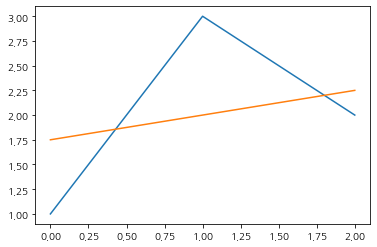

In [29]:
import matplotlib.pyplot as plt

plt.plot(x, y)
plt.plot(x, [a*x+b for x in x])
plt.show()

## 다항식 회귀법
$y=ax^2+bx+c$ 근사

In [30]:
from numpy import linspace
from numpy.linalg import det

# data
x = array([0, 1, 2, 4])
y = array([2, 3, 9, 15])
n = len(x)

x1sm = sum(x)
y1sm = sum(y)
x2sm = sum(x**2)
x3sm = sum(x**3)
x4sm = sum(x**4)
xysm = sum(x*y)
x2ysm = sum((x**2)*y)

# Cramer's Rule
eq = array([
    [x2sm, x3sm, x4sm],
    [x1sm, x2sm, x3sm],
    [n, x1sm, x2sm]
    ])
rig = array([x2ysm, xysum, y1sm])
detabc = det(eq)
eqc = array([[x2ysm, x2ysm, x4sm],
             [x1sm, xysm, x3sm],
             [n, y1sm, x2sm]])
eqb = array([[x2sm, x2ysm, x4sm],
             [x1sm, xysm, x3sm],
             [n, y1sm, x2sm]])
eqa = array([[x2sm, x3sm, x2ysm],
             [x1sm, x2sm, xysm],
             [n, x1sm, y1sm]])

detc = det(eqc)
detb = det(eqb)
deta = det(eqa)
a = deta/detabc
b = detb/detabc
c = detc/detabc

print(f"a={a}\nb={b}\nc={c}")

a=0.11363636363636433
b=2.986363636363634
c=246.91363636363687


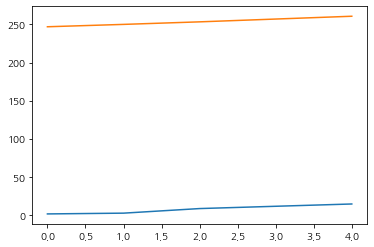

In [32]:
plt.plot(x, y)
plt.plot(x, [a*(x**2)+b*x+c for x in x])
plt.show()

## Simple Regression Problem
$y = a + bx + \epsilon$

In [33]:
import numpy as np

# 랜덤한 초기 데이터 생성
x = np.random.rand(100, 1)
y = 1 + 2 * x + .1 * np.random.randn(100, 1)

idx = np.arange(100)
np.random.shuffle(idx)

train_idx = idx[:80]
val_idx = idx[80:]

x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

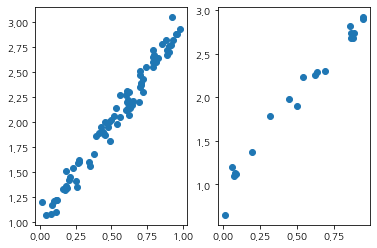

In [37]:
plt.subplot(121)
plt.scatter(x_train, y_train)
plt.subplot(122)
plt.scatter(x_val, y_val)
plt.show()

## Gradient Descent
1. Loss 계산
2. 변화율(Gradient) 계산
3. 파라미터 갱신

In [40]:
# 랜덤하게 초기 가중치 부여
a = np.random.randn(1)
b = np.random.randn(1)

print(f"초기 가중치: a={a}, b={b}")

lr = 1e-1
n_epochs = 1000

for epoch in range(n_epochs):
    yhat = a + b * x_train
    
    error = (y_train - yhat)
    # MSE
    loss = (error ** 2).mean()
    
    # 역전파
    a_grad = -2 * error.mean()
    b_grad = -2 * (x_train * error).mean()
    
    # 가중치 갱신
    a = a - lr * a_grad
    b = b - lr * b_grad
    
print(f"구현한 가중치: a={a}, b={b}")

# 실제값과 비교
from sklearn.linear_model import LinearRegression
linr = LinearRegression()
linr.fit(x_train, y_train)
print(f"구현된 방식을 이용해 구한 가중치: a={linr.intercept_}, b={linr.coef_[0]}")

초기 가중치: a=[1.08482552], b=[-1.44885791]
구현한 가중치: a=[1.002573], b=[1.9796799]
구현된 방식을 이용해 구한 가중치: a=[1.00255179], b=[1.97971745]


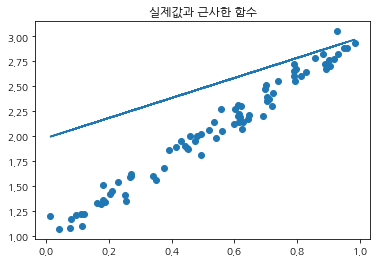

In [49]:
plt.scatter(x_train, y_train)
plt.plot(x, [a*x+b for x in x])
plt.title("실제값과 근사한 함수")
plt.show()

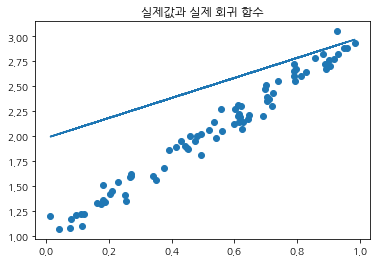

In [51]:
plt.scatter(x_train, y_train)
plt.plot(x, [linr.intercept_*x+linr.coef_[0] for x in x])
plt.title("실제값과 실제 회귀 함수")
plt.show()